# Meteorite Mania
**Author:** Jonathan Fetterolf

## Overview
This notebook analayzes a dataset of known meteorite landing sites and the data associated with those meteorites. I derived some statistics about the known meteorites and mapped their landing sites as well as looked into where the majority of meteorites fell. In terms of mass, the largest known meteorite is 60000kg which is contrasted by the smallest that comes in at 1e-05kg. The mean mass of the dataset is approximately 15.6kg, while the median is approximately 0.029kg. Nearly 74% of known meteorite landing sites are in the southern hemisphere while 26% are in the northern hemisphere.This overwhelming amount of known meteorite landing sites can be explained by this information compiled by the [Department of Earth and Planetary Sciences](https://sites.wustl.edu/meteoritesite/items/some-meteorite-statistics/) at the Washington University in St. Louis. 

They state:  *"Nearly all meteorites are found in deserts. (Yes, Antarctica is a desert because the annual precipitation rate is very low.) Deserts are places that accumulate meteorites over thousands of years and then nothing much happens to the meteorite. Also, meteorites are easier to find in deserts than in places with topography, vegetation, and other rocks."*

## Understanding & Cleaning Data

This comprehensive data set from The Meteoritical Society contains information on all of the known meteorite landings up to 2013. The Fusion Table is collected by Javier de la Torre. This data consists of 34,513 meteorites. This dataset was obtained [here](https://catalog.data.gov/dataset/meteorite-landings) through [data.gov](https://data.gov/).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import geopandas as gpd

In [2]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [3]:
df = pd.read_csv('data/Meteorite_Landings.csv', index_col=0)

In [4]:
df.columns

Index(['id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

In [5]:
# So let's rename the columns
newcols = [col.strip().lower().replace(' ','') for col in df.columns]
newcols

['id',
 'nametype',
 'recclass',
 'mass(g)',
 'fall',
 'year',
 'reclat',
 'reclong',
 'geolocation']

In [6]:
# Check our work
df.columns = newcols
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45716 entries, Aachen to Zulu Queen
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           45716 non-null  int64  
 1   nametype     45716 non-null  object 
 2   recclass     45716 non-null  object 
 3   mass(g)      45585 non-null  float64
 4   fall         45716 non-null  object 
 5   year         45425 non-null  float64
 6   reclat       38401 non-null  float64
 7   reclong      38401 non-null  float64
 8   geolocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 3.5+ MB


In [7]:
#dropping null values mostly from year and coordinates
df = df.dropna()
#drop the entry with incorrecly entered year
df = df[ df['year'] <= 2013]
df.sort_values(by='year', ascending=False)
#drop mass of 0
df = df[ df['mass(g)'] > 0]

In [8]:
#creating a mass(kg) column
df['mass(kg)'] = df['mass(g)']/1000

In [9]:
key = {'Not Found' : 'Fell'}
replace_key = {v: k for k, v in key.items()}
df['fall'].replace(replace_key, inplace=True)

In [10]:
#checking work
df.fall.value_counts()

Found        37030
Not Found     1065
Name: fall, dtype: int64

## Data Interpretation & Visualization

In [11]:
df['mass(kg)'].describe()

count    38095.000000
mean        15.608895
std        628.846657
min          0.000010
25%          0.006665
50%          0.029100
75%          0.187745
max      60000.000000
Name: mass(kg), dtype: float64

In [12]:
largest_mass = df['mass(kg)'].max()
smallest_mass = df['mass(kg)'].min()
mean_mass = df['mass(kg)'].mean()
median_mass = df['mass(kg)'].median()

largest_mass, smallest_mass, mean_mass, median_mass

(60000.0, 1e-05, 15.60889452001575, 0.0291)

<AxesSubplot: xlabel='mass(g)'>

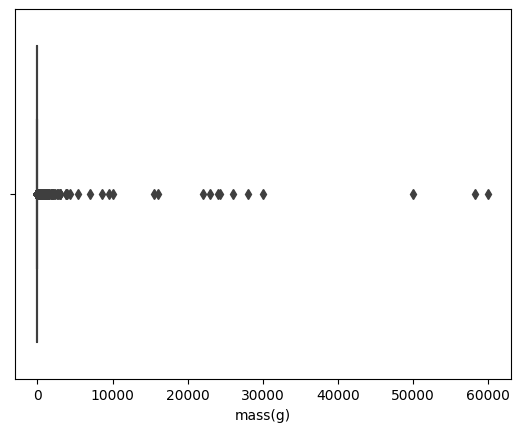

In [13]:
#exploratory boxplot
#the box & whiskers are represented by the single vertical line
#this is caused by the massive outliers shown by everything to the right

sns.boxplot(x=df['mass(g)'][ df['mass(g)'] > 0]/1000)

There are still 23939 points of data for mass after limiting mass(g) to anything under 70g.


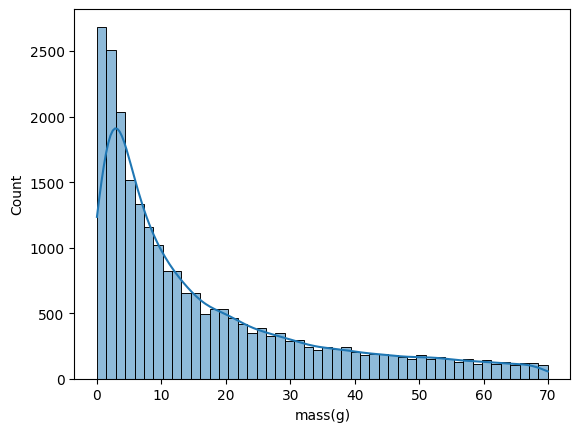

In [14]:
#exploratory histogram with kde
#limiting our data to everything under 70g to get a plot that can be read
sns.histplot(x=df['mass(g)'][ df['mass(g)'] < 70], kde=True), 
print("There are still " + str(len(df['mass(g)'][ df['mass(g)'] < 70])) + \
      " points of data for mass after limiting mass(g) to anything under 70g.")

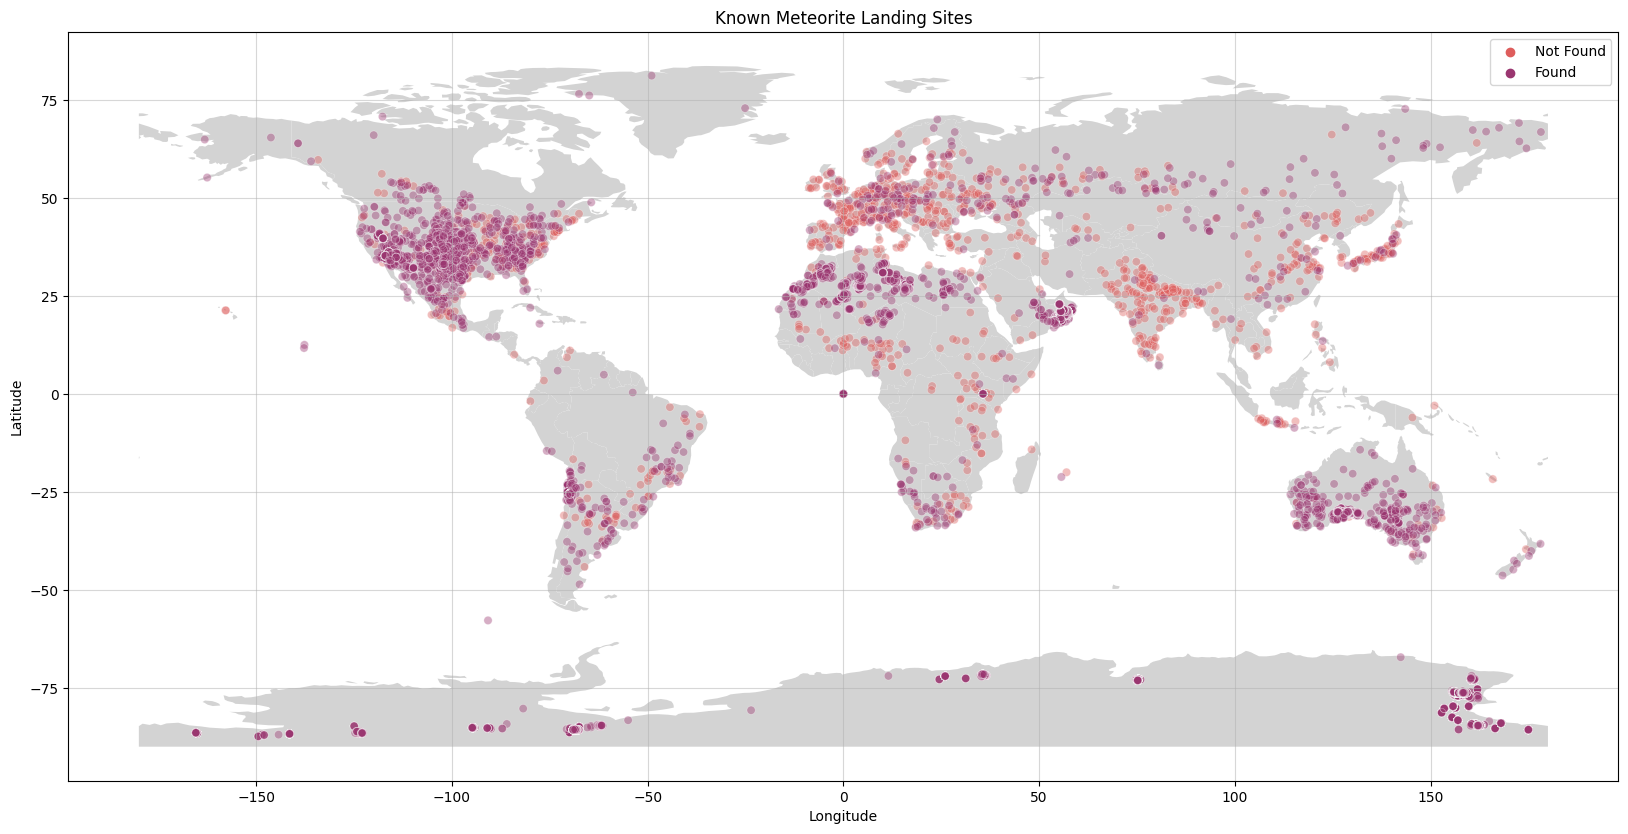

In [27]:
#plotting all known meteorite landing sites
fig1, ax1 = plt.subplots(figsize=(20, 10))

countries.plot(color="lightgrey", ax=ax1)

sns.scatterplot(data=df, x='reclong', y='reclat', hue='fall', ax=ax1, palette='flare', alpha=0.4)

ax1.set_title('Known Meteorite Landing Sites')
ax1.grid(visible=True, alpha=0.5)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.legend(title='')

In [16]:
#limiting to top 100 largest (by mass) known meteorite landing sites
df_top_100_largest_strikes = df.sort_values(by='mass(kg)', ascending=False).head(100)
df_top_100_largest_strikes

,id,nametype,recclass,mass(g),fall,year,reclat,reclong,geolocation,mass(kg)
name,,,,,,,,,,
Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920.0,-19.58333,17.91667,"(-19.58333, 17.91667)",60000.0
Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,1818.0,76.13333,-64.93333,"(76.13333, -64.93333)",58200.0
Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575.0,-27.46667,-60.58333,"(-27.46667, -60.58333)",50000.0
Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,1891.0,35.05000,-111.03333,"(35.05, -111.03333)",30000.0
Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,1898.0,47.00000,88.00000,"(47.0, 88.0)",28000.0
...,...,...,...,...,...,...,...,...,...,...
Yanhuitlan,30349,Valid,"Iron, IVA",421000.0,Found,1825.0,17.53333,-97.35000,"(17.53333, -97.35)",421.0
Paragould,18101,Valid,LL5,408000.0,Not Found,1930.0,36.06667,-90.50000,"(36.06667, -90.5)",408.0
Allan Hills A76009,1316,Valid,L6,407000.0,Found,1976.0,-76.71667,159.66667,"(-76.71667, 159.66667)",407.0


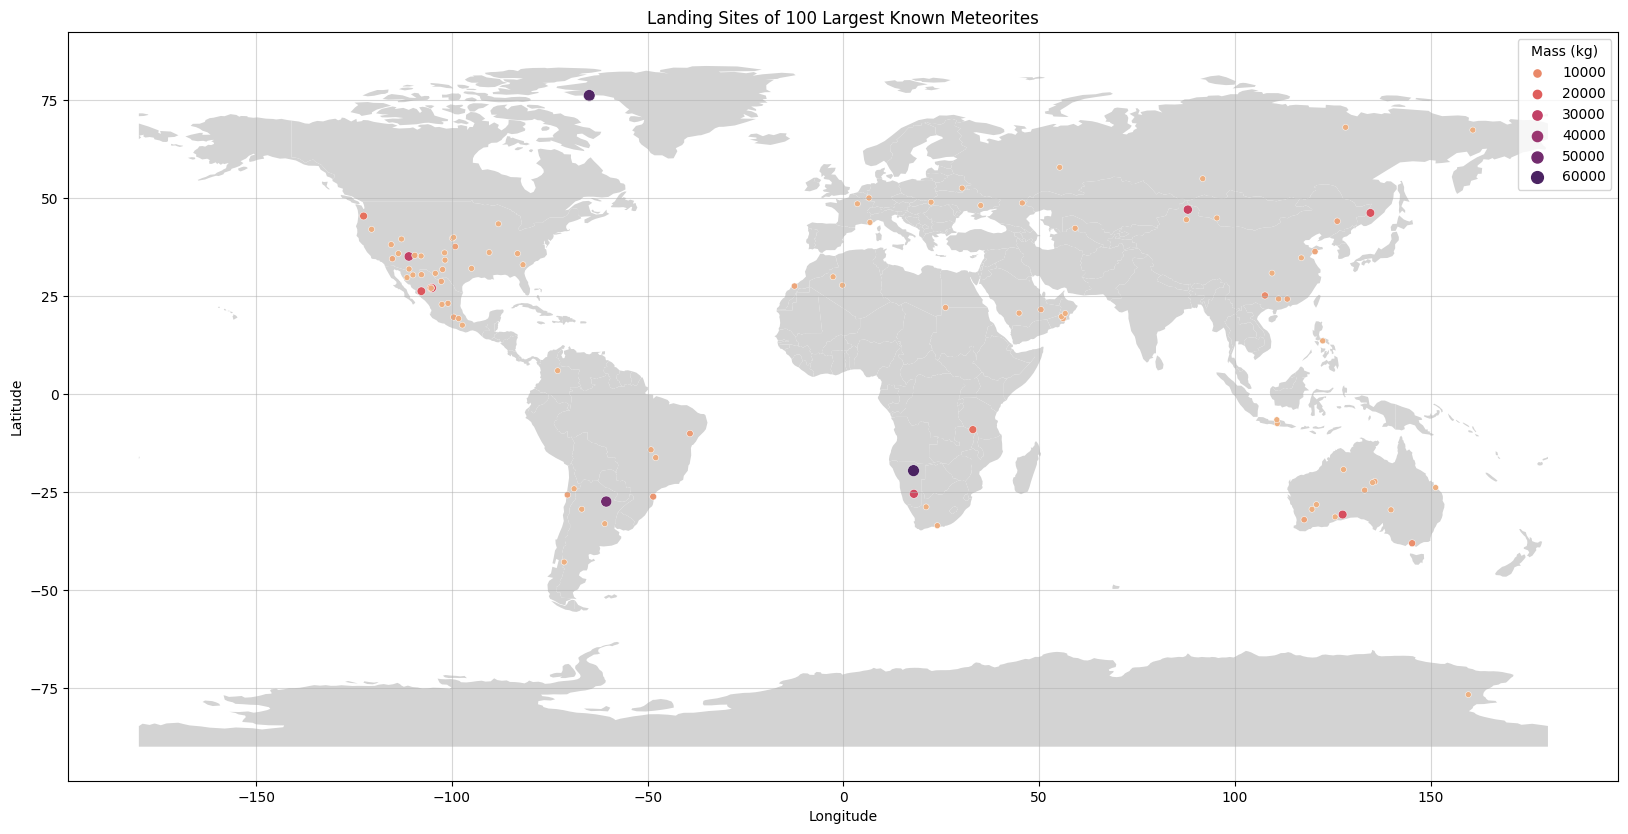

In [17]:
#plotting top 100 largest (by mass) known meteorite landing sites
fig4, ax4 = plt.subplots(figsize=(20, 10))

countries.plot(color="lightgrey", ax=ax4)

sns.scatterplot(data=df_top_100_largest_strikes, x='reclong', y='reclat', hue='mass(kg)', size='mass(kg)', ax=ax4, palette='flare')

ax4.set_title('Landing Sites of 100 Largest Known Meteorites')
ax4.grid(visible=True, alpha=0.5)
ax4.set_xlabel('Longitude')
ax4.set_ylabel('Latitude')
ax4.legend(title='Mass (kg)')

In [18]:
#limiting to top 500 largest (by mass) known meteorite landing sites
df_top_500_largest_strikes = df.sort_values(by='mass(kg)', ascending=False).head(500)
df_top_500_largest_strikes

,id,nametype,recclass,mass(g),fall,year,reclat,reclong,geolocation,mass(kg)
name,,,,,,,,,,
Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920.0,-19.58333,17.91667,"(-19.58333, 17.91667)",60000.0
Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,1818.0,76.13333,-64.93333,"(76.13333, -64.93333)",58200.0
Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575.0,-27.46667,-60.58333,"(-27.46667, -60.58333)",50000.0
Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,1891.0,35.05000,-111.03333,"(35.05, -111.03333)",30000.0
Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,1898.0,47.00000,88.00000,"(47.0, 88.0)",28000.0
...,...,...,...,...,...,...,...,...,...,...
Dix,7651,Valid,L6,44000.0,Found,1927.0,41.23333,-103.48333,"(41.23333, -103.48333)",44.0
Rodeo,22643,Valid,"Iron, IID",44000.0,Found,1852.0,25.33333,-104.66667,"(25.33333, -104.66667)",44.0
Barwell,4954,Valid,L5,44000.0,Not Found,1965.0,52.56528,-1.33972,"(52.56528, -1.33972)",44.0


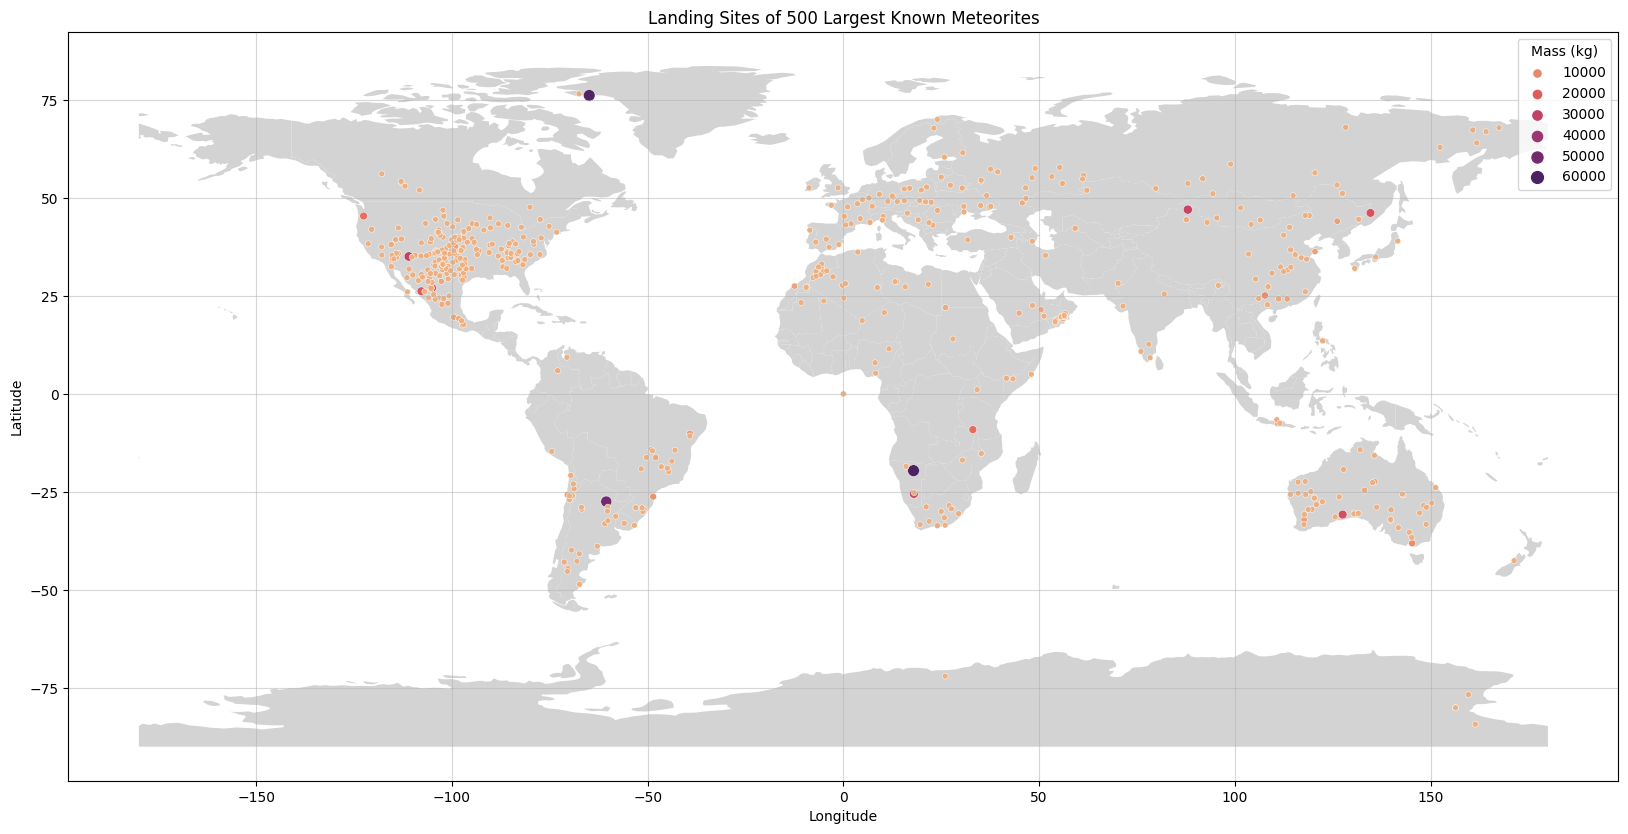

In [19]:
#plotting sites of top 500 largest (by mass) known meteorites
fig5, ax5 = plt.subplots(figsize=(20, 10))

countries.plot(color="lightgrey", ax=ax5)

sns.scatterplot(data=df_top_500_largest_strikes, x='reclong', y='reclat', hue='mass(kg)', size='mass(kg)', ax=ax5, palette='flare')

ax5.set_title('Landing Sites of 500 Largest Known Meteorites')
ax5.grid(visible=True, alpha=0.5)
ax5.set_xlabel('Longitude')
ax5.set_ylabel('Latitude')
ax5.legend(title='Mass (kg)')

In [20]:
#happy to not have been living to see one of these firsthand...
df_top_10_largest_strikes = df.sort_values(by='mass(kg)', ascending=False).head(10)
df_top_10_largest_strikes['year']

name
Hoba               1920.0
Cape York          1818.0
Campo del Cielo    1575.0
Canyon Diablo      1891.0
Armanty            1898.0
Gibeon             1836.0
Chupaderos         1852.0
Mundrabilla        1911.0
Sikhote-Alin       1947.0
Bacubirito         1863.0
Name: year, dtype: float64

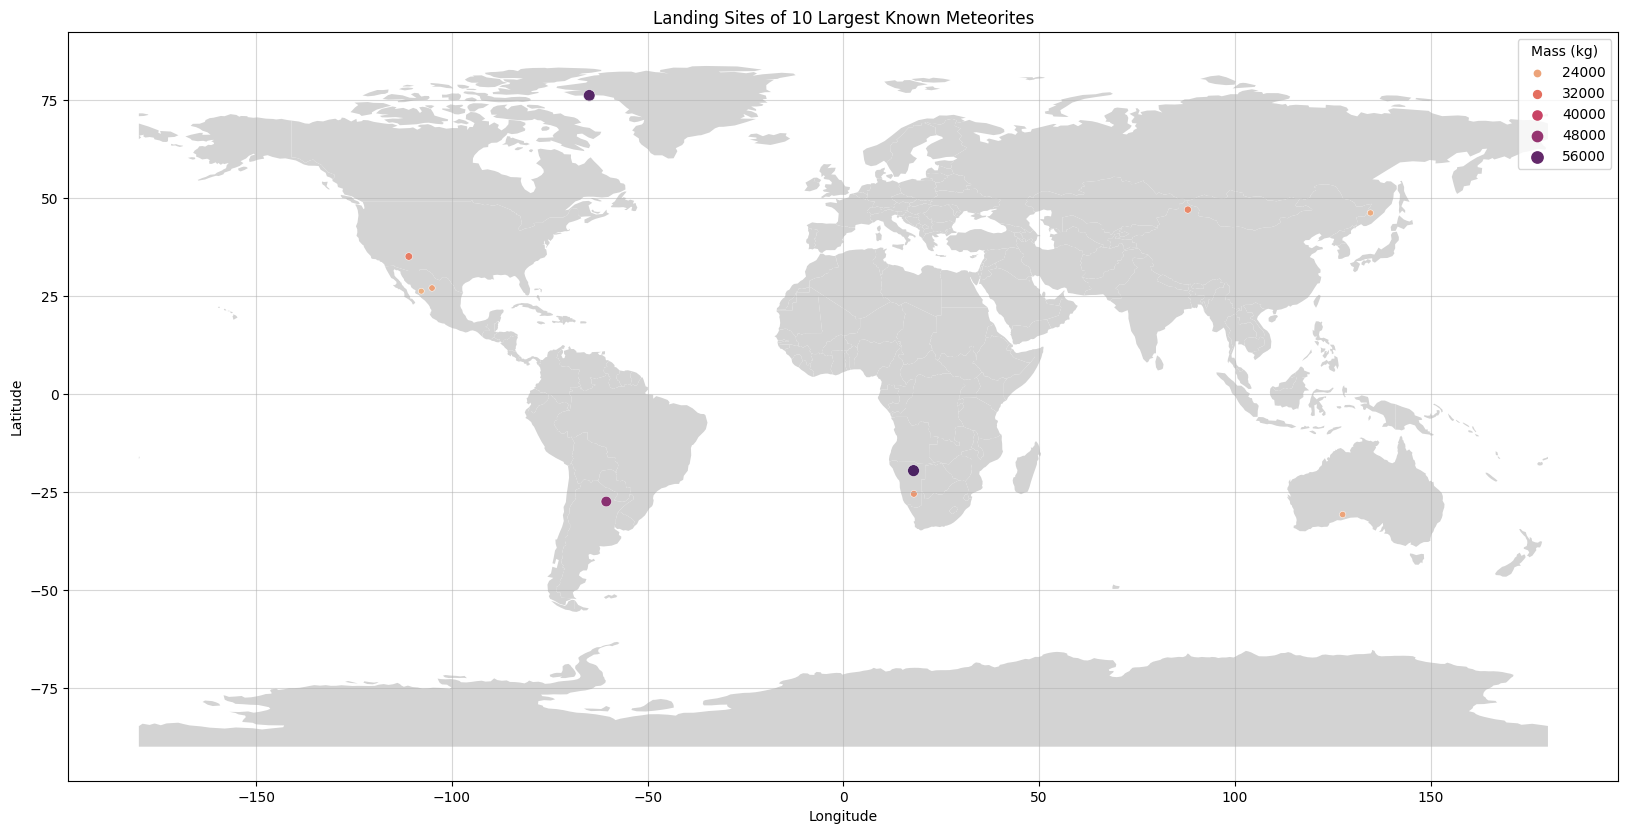

In [21]:
fig6, ax6 = plt.subplots(figsize=(20, 10))

countries.plot(color="lightgrey", ax=ax6)

sns.scatterplot(data=df_top_10_largest_strikes, x='reclong', y='reclat', hue='mass(kg)', size='mass(kg)', ax=ax6, palette='flare')

ax6.set_title('Landing Sites of 10 Largest Known Meteorites')
ax6.grid(visible=True, alpha=0.5)
ax6.set_xlabel('Longitude')
ax6.set_ylabel('Latitude')
ax6.legend(title='Mass (kg)')

In [22]:
df_northern_hem = df[ df['reclat'] > 0]
df_southern_hem = df[ df['reclat'] < 0]
df_equatorial = df[ df['reclat'] == 0]

In [23]:
len(df_northern_hem), len(df_equatorial), len(df_southern_hem)

(8302, 6408, 23385)

In [24]:
#only northern and southern hemisphere included
#equatorial sites not included
total_sites = (len(df_northern_hem) + len(df_southern_hem))

#percentage of sites in n_hem and s_hem
percent_n_hem_sites = (len(df_northern_hem) / total_sites) * 100
percent_s_hem_sites = (len(df_southern_hem) / total_sites) * 100
percent_n_hem_sites, percent_s_hem_sites

(26.200018935210025, 73.79998106478997)

According to this dataset, nearly 74% of known meteorite landing sites are in the southern hemisphere while 26% are in the northern hemisphere. 

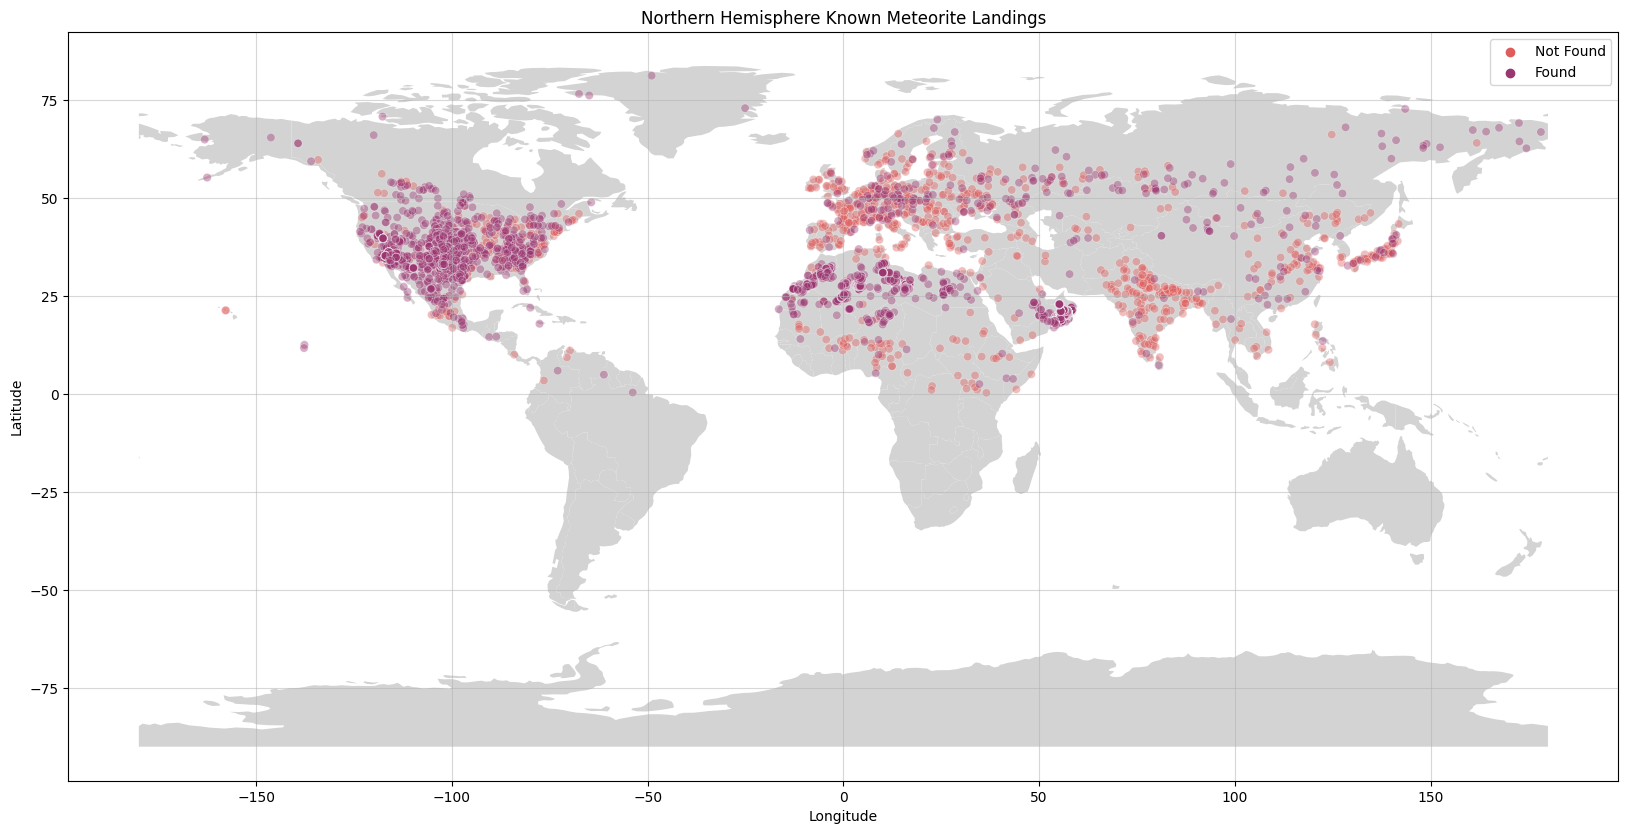

In [25]:
#plotting all sites in northern hemisphere
fig1, ax1 = plt.subplots(figsize=(20, 10))

countries.plot(color="lightgrey", ax=ax1)

sns.scatterplot(data=df_northern_hem, x='reclong', y='reclat',\
                hue='fall', ax=ax1, palette='flare', alpha=0.4)

ax1.set_title('Northern Hemisphere Known Meteorite Landings')
ax1.grid(visible=True, alpha=0.5)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.legend(title='')

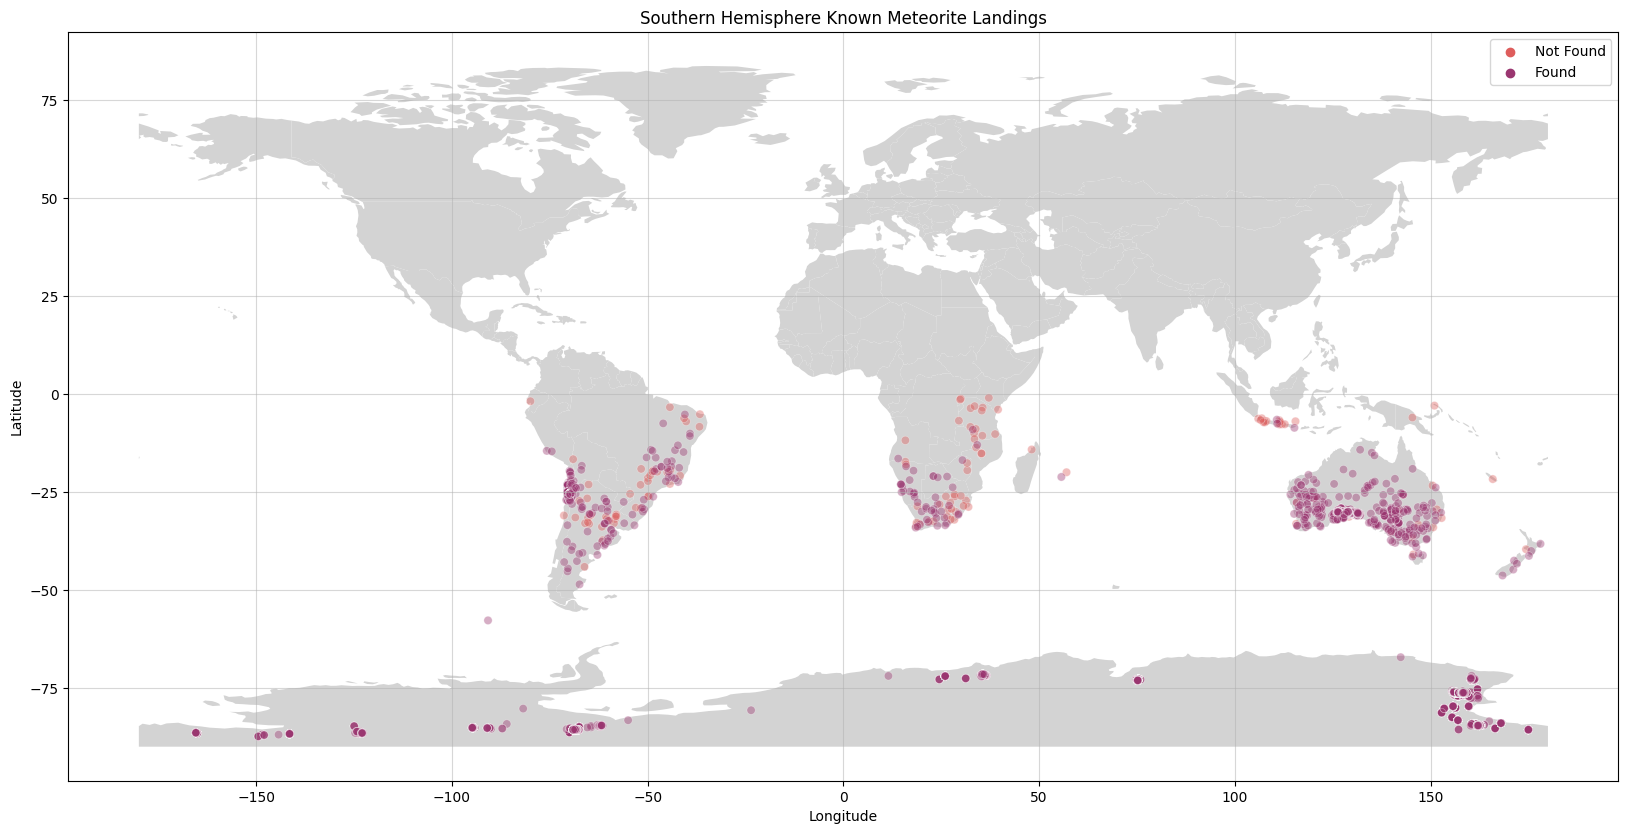

In [26]:
#plotting all sites in southern hemisphere
fig1, ax1 = plt.subplots(figsize=(20, 10))

countries.plot(color="lightgrey", ax=ax1)

sns.scatterplot(data=df_southern_hem, x='reclong', y='reclat', hue='fall', ax=ax1, palette='flare', alpha=0.4)

ax1.set_title('Southern Hemisphere Known Meteorite Landings')
ax1.grid(visible=True, alpha=0.5)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.legend(title='')

## Conclusions

**Mass**
- In terms of mass, the largest known meteorite is 60000kg which is contrasted by the smallest that comes in at 1e-05kg. 
- The mean mass of the dataset is approximately 15.6kg.
- The median is approximately 0.029kg. 

**Location**
- Approximately 74% of known meteorite landing sites are in the southern hemisphere.
- Approximately 26% of known meteorite landing sites are in the northern  hemisphere.

**Limitations**
- The dataset only contains data up to 2013.
- There are many known sites exactly on the equator. I did not include these in either northern, or southern hemisphere.
- Many sites in the southern hemisphere, specifically Antartica are close so the visual representation of the data leads you to believe there are more landing sites in the northern hemisphere when in actuallity, it is the opposite conclusion. 